### <div align="center">Model Optimization: Training Algorithm</div>

#### 7.1: Model Optimization Overview
- Model Optimization is a process of finding the best way to train a model such that we can train it faster by using less compute resources and the model performs well during prediction phase.
- Model Optimization:
  1. Training Algorithm
  2. Regularization Techniques
  3. Hyperparameter Tuning
- Training Algorithm
  1. Gradient Descent
  2. GD with Momentum
  3. RMSProp
  4. Adam
- Model Optimization is a process of finding the best way to train a model such that we can train it faster by using less compute resources and the model performs well during prediction phase.
- Model optimization can be done using various ways such as Using different optimizers (GD, Momentum, RMSProp, etc.), Regularization techniques (L1, L2, Dropout), Hyperparameter tuning and so on.

#### 7.2: Exponentially Weighted Moving Average
- Exponentially Weighted Moving Average (EWMA) gives more weight to recent data, smoothing out fluctuations over time
- The decay factor (β) controls how much past data influences the current average, with higher values giving longer memory. People tend to use 0.9 as a common value for this factor

#### 7.3: Gradient Descent with Momentum
- GD with momentum accelerates convergence by building on past gradients, reducing the time to reach the minimum.
- The momentum term smooths out oscillations, especially in regions with steep, narrow valleys, leading to a more stable optimization path.
- Momentum helps GD escape small local minima and flat regions, making it more effective in complex loss landscapes.
- The momentum coefficient (β) controls how much influence previous gradients have on the current update.
- GD with momentum is widely used in deep learning to achieve faster and more reliable training.

#### 7.4: RMSProp
- RMSProp uses an Exponentially Weighted Moving Average of squared gradients to reduce oscillations.
- Helps models converge faster and works well with noisy gradients.

#### 7.5: Adam
- Adam combines momentum and RMSProp for efficient updates.
- Tracks both mean and squared gradients to stabilize weight updates.

#### 7.6: Optimizers in action with Fashion MNIST

In [5]:
import torch
from torch import nn, optim
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [6]:
training_data = datasets.FashionMNIST(
    root="../../data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="../../data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [7]:
batch_size=64

train_loader = DataLoader(training_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [8]:
labels[0]

tensor(9)

In [9]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

classes[labels[7].item()]

'Pullover'

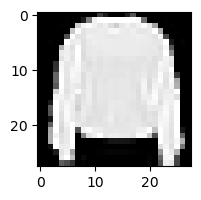

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(images[7].cpu().squeeze(), cmap='gray')
plt.show()

### Build Neural Network

In [11]:
device = ("cpu")
device

'cpu'

In [12]:
class ClothsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        return self.network(x)

In [13]:
model = ClothsClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
epochs = 2

model.train()

for epoch in range(epochs):
    for batch, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        pred = model(images)
        loss = loss_fn(pred, labels)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        if batch % 100 == 0:
            print(f"Batch: {batch}, Loss: {loss.item()}")

Batch: 0, Loss: 2.3064370155334473
Batch: 100, Loss: 0.7541647553443909
Batch: 200, Loss: 0.4514106512069702
Batch: 300, Loss: 0.6254411935806274
Batch: 400, Loss: 0.5372046232223511
Batch: 500, Loss: 0.4879347085952759
Batch: 600, Loss: 0.4365442097187042
Batch: 700, Loss: 0.6160446405410767
Batch: 800, Loss: 0.5373719334602356
Batch: 900, Loss: 0.5265288352966309
Batch: 0, Loss: 0.3111097812652588
Batch: 100, Loss: 0.4406161606311798
Batch: 200, Loss: 0.3175817131996155
Batch: 300, Loss: 0.44495803117752075
Batch: 400, Loss: 0.41352298855781555
Batch: 500, Loss: 0.39036476612091064
Batch: 600, Loss: 0.3605786859989166
Batch: 700, Loss: 0.5536317229270935
Batch: 800, Loss: 0.44425585865974426
Batch: 900, Loss: 0.4891393482685089


In [15]:
# Testing the model
model.eval()  # Switch to evaluation mode

all_predicted = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        # Append labels and predictions to lists
        all_labels.extend(labels.cpu().numpy())    
        all_predicted.extend(predicted.cpu().numpy()) 

In [16]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1000
           1       0.96      0.96      0.96      1000
           2       0.85      0.54      0.66      1000
           3       0.82      0.89      0.85      1000
           4       0.61      0.89      0.72      1000
           5       0.97      0.93      0.95      1000
           6       0.69      0.54      0.61      1000
           7       0.89      0.97      0.93      1000
           8       0.93      0.98      0.95      1000
           9       0.97      0.92      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

